In [49]:
import os
print("all ok")
import certifi
os.environ['SSL_CERT_FILE'] = certifi.where()

all ok


In [50]:
from dotenv import load_dotenv
load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [51]:
model="deepseek-r1-distill-llama-70b"
from langchain_groq import ChatGroq


In [52]:
llm=ChatGroq(model=model)
llm.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.071005191, 'prompt_time': 0.009323901, 'queue_time': 0.043219886, 'total_time': 0.080329092}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--1a1fbcd6-3843-4ea1-b4b4-98cc16955b98-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [53]:
print(llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [54]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage ,AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END


In [55]:
def call_model(state: MessagesState):
    messages = state['messages']
    responce = llm.invoke(messages)
    return {"messages":[responce]}

In [56]:
state = {"messages":["hi hello how are you?"]}

In [57]:
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.178651067, 'prompt_time': 0.00994363, 'queue_time': 0.048661617, 'total_time': 0.188594697}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--52b5ded2-4ae4-45dc-a7b4-005c95d00c73-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

## Design a simple Workflow without tool calling 

In [58]:
workflow = StateGraph(MessagesState)

In [59]:
workflow.add_node("my_bot",call_model)

In [60]:
workflow.add_edge(START,"my_bot")


In [61]:
workflow.add_edge("my_bot",END)

In [62]:
app  = workflow.compile()

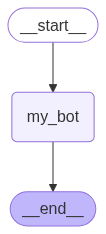

In [63]:
from IPython.display import Image ,display
display(Image(app.get_graph().draw_mermaid_png()))

In [66]:
input={"messages":["hi hello how are you?"]}


In [67]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='fce78518-e026-4bf3-ac12-2e2c3e0377ed'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.197472996, 'prompt_time': 0.009841917, 'queue_time': 0.049759934, 'total_time': 0.207314913}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--01cf1420-c131-4db2-99a2-607d21dae0ea-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [68]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from my_bot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.175435409, 'prompt_time': 0.014857273, 'queue_time': 0.050133717, 'total_time': 0.190292682}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--10615467-3288-4c79-9f47-d263a88cfa80-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}




## workflow with tool calling

In [69]:
@tool
def search(query:str):
    """this is my custom for seaching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degtrress and sunny "
    return " the temp is 25 degress cloudy"

In [71]:
search.invoke("what is s temparature in kashmir?")

' the temp is 25 degress cloudy'

In [75]:
search.invoke("what is s temparature in delhi?")

'the temp is 45 degtrress and sunny '

In [73]:
search

StructuredTool(name='search', description='this is my custom for seaching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000288BA6F9D00>)

In [74]:
llm.invoke("what  is a weather in delhi?")

AIMessage(content="<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, Delhi generally experiences a humid subtropical climate with extreme variations in temperature throughout the year. Here's a breakdown of Delhi's typical weather:\n\n- **Summer (March to June):** Extremely hot with temperatures often reaching 45°C (113°F) or more.\n- **Monsoon (July to September):** Hot and humid with frequent rain showers, but the rain can sometimes cause flooding.\n- **Winter (December to February):** Cool to cold with temperatures dropping as low as 2-4°C (36-39°F). Fog is common during this season.\n- **Autumn (October to November) and Spring (February to March):** Mild and pleasant with temperatures ranging from 12°C to 25°C (54°F to 77°F).\n\nFor the most accurate and current weather information, I recommend checking a reliable weather service like the India Meteorological Department (IMD) or a weather app.", additional_kwargs={}, 

## Bindind a tool to the llm
